# 🔥 Heatmap trong Python với Seaborn

## ✅ Heatmap là gì?
Heatmap (bản đồ nhiệt) là biểu đồ thể hiện dữ liệu dạng ma trận (bảng), trong đó **màu sắc đại diện cho giá trị**. Thường dùng để:

- Trực quan hóa **ma trận tương quan**
- Phân tích **mức độ cao/thấp** giữa các nhóm
- Xác định **mối quan hệ giữa nhiều biến**

---

## 🧪 Cú pháp cơ bản với Seaborn

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Ví dụ với ma trận tương quan
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan")
plt.show()

📌 Giải thích các tham số

| Tham số          | Ý nghĩa                                                                 |
|------------------|------------------------------------------------------------------------|
| `annot=True`     | Hiển thị giá trị số trên từng ô                                        |
| `cmap='coolwarm'`| Chọn bảng màu (có thể dùng `'viridis'`, `'Blues'`, `'YlGnBu'`, v.v.)   |
| `fmt=".2f"`      | Định dạng giá trị số (ví dụ `.2f` là làm tròn 2 chữ số thập phân)      |
| `linewidths=0.5` | Độ dày đường kẻ giữa các ô                                             |
| `vmin`, `vmax`   | Xác định giá trị nhỏ nhất/lớn nhất để cố định thang màu               |


In [123]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\hungd\AppData\Local\Temp\ipykernel_7956\3738200803.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='survived', index='sex', columns='class')


(array([0.5, 1.5]), [Text(0, 0.5, 'female'), Text(0, 1.5, 'male')])

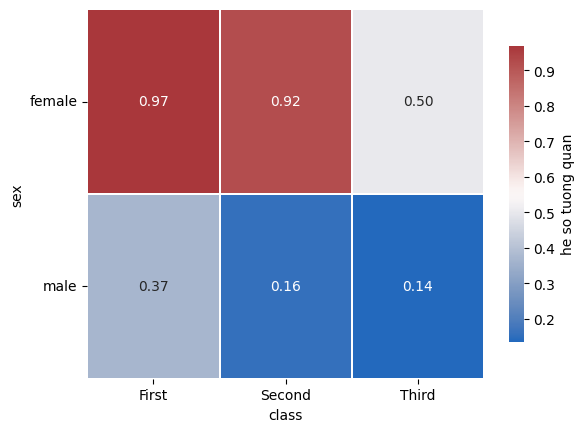

In [158]:
'''🔢 values = dữ liệu cần tính
🧍 index = nhóm dọc
➡️ columns = nhóm ngang'''

pivot = df.pivot_table(values='survived', index='sex', columns='class')

#   cbar_kws={"shrink": 0.8, "label": "Hệ số tương quan"},
#     annot_kws={"size": 10, "weight": "bold"}
# )
sns.heatmap(pivot,
            cmap ='vlag',
            annot=True,
            fmt='.2f',
            linecolor='white',
            linewidths=0.2,
            cbar_kws={'shrink': 0.8, 'label' : 'he so tuong quan'})
plt.yticks(rotation = 360)


In [125]:
# d1 = df.corr(numeric_only=True)
# d1= df.select_dtypes(include = 'number').corr
# d1
# plt.figure(figsize=(6,4))
# sns.heatmap(d1, annot= True, cmap = 'vlag', linecolor='white', xticklabels=True, yticklabels=True, fmt='.3f',linewidths=0.1  
# )

# plt.xticks(rotation = 90)

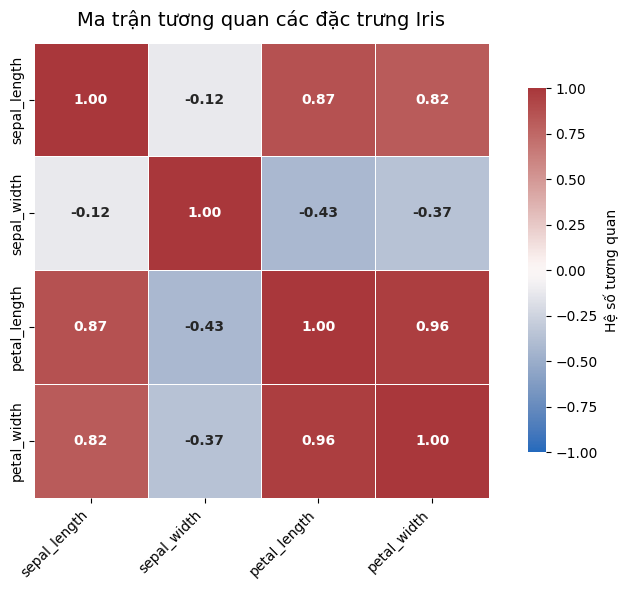

In [164]:
df = sns.load_dataset('iris')

# data = df.drop(columns = ['species']).corr()
data = df.select_dtypes(include = 'number').corr()
plt.figure(figsize=(8, 6))


sns.heatmap(
    data,
    annot=True,
    fmt=".2f",
    # cmap="coolwarm",
    cmap = 'vlag',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor="white",
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Hệ số tương quan"},
    annot_kws={"size": 10, "weight": "bold"}
)

plt.title("Ma trận tương quan các đặc trưng Iris", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()